In [1]:
import torch
import torch.nn as nn

In [2]:
net = nn.Sequential(
    nn.Linear(3,4),
    nn.Linear(4,5)
)

In [5]:
net[:-1](torch.randn(10,3)).shape

torch.Size([10, 4])

In [95]:
x = torch.tensor([[1,2,3,4,5]], dtype=float).double()
y = torch.tensor([[4,2,6,8,10]], dtype=float).double()

In [96]:
ln = nn.LayerNorm(5).double()

In [97]:
xx = ln(x)[0]

In [98]:
yy = ln(y)[0]

In [113]:
a = torch.tensor([[1e-3, 1e-1]])
x = nn.LayerNorm(2)(a)
print(a)
print(x)
print(torch.softmax(x, dim=-1))

tensor([[0.0010, 0.1000]])
tensor([[-0.9980,  0.9980]], grad_fn=<NativeLayerNormBackward>)
tensor([[0.1196, 0.8804]], grad_fn=<SoftmaxBackward>)


tensor([-7.0711e-01, -1.4142e+00, -1.1102e-16,  7.0711e-01,  1.4142e+00],
       dtype=torch.float64, grad_fn=<SelectBackward>)

In [106]:
import numpy as np
torch.sum(xx[4:]*yy[4:])

tensor(2.0000, dtype=torch.float64, grad_fn=<SumBackward0>)

In [92]:
import math
torch.sum(x * y)

tensor(124., dtype=torch.float64)

In [39]:
torch.softmax(torch.tensor([-0.5, 0.5, 0.5, 0.5]), dim=-1)

tensor([0.1092, 0.2969, 0.2969, 0.2969])

In [45]:
from numpy import corrcoef, array
x = array([1,2,3,4,5,6,7,8,9])
print(x)
y = array([9,8,7,6,5,4,3,2,1])
print(y)
Sigma = corrcoef(x,x)
print(Sigma)

[1 2 3 4 5 6 7 8 9]
[9 8 7 6 5 4 3 2 1]
[[1. 1.]
 [1. 1.]]


In [43]:

from numpy import array
from numpy import cov
x = array([1,2,3,4,5,6,7,8,9])
print(x)
y = array([9,8,7,6,5,4,3,2,1])
print(y)
Sigma = cov(x,y)
print(Sigma)

[1 2 3 4 5 6 7 8 9]
[9 8 7 6 5 4 3 2 1]
[[ 7.5 -7.5]
 [-7.5  7.5]]


In [44]:
cov?

Signature:
cov(
    m,
    y=None,
    rowvar=True,
    bias=False,
    ddof=None,
    fweights=None,
    aweights=None,
)
Docstring:
Estimate a covariance matrix, given data and weights.

Covariance indicates the level to which two variables vary together.
If we examine N-dimensional samples, :math:`X = [x_1, x_2, ... x_N]^T`,
then the covariance matrix element :math:`C_{ij}` is the covariance of
:math:`x_i` and :math:`x_j`. The element :math:`C_{ii}` is the variance
of :math:`x_i`.

See the notes for an outline of the algorithm.

Parameters
----------
m : array_like
    A 1-D or 2-D array containing multiple variables and observations.
    Each row of `m` represents a variable, and each column a single
    observation of all those variables. Also see `rowvar` below.
y : array_like, optional
    An additional set of variables and observations. `y` has the same form
    as that of `m`.
rowvar : bool, optional
    If `rowvar` is True (default), then each row represents a
    variable, w

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']


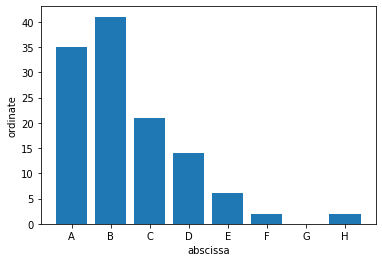

In [116]:
# #04.Problem028
a  = [35, 41, 21, 14, 6, 2, 0, 2]
import matplotlib.pyplot as plt
import string
a  = [35, 41, 21, 14, 6, 2, 0, 2]
up = string.ascii_uppercase

x=[]
for i in range(len(a)):
    x+=up[i]
print(x)
plt.bar(x,a)
plt.xlabel('abscissa')
plt.ylabel('ordinate')
plt.show()

In [117]:
import numpy as np
a  = np.array([35, 41, 21, 14, 6, 2, 0, 2])

In [215]:
!wget http://gp-ds.tohoku.ac.jp/class/camp1_2019b/material/letter_recognition_data.txt

--2019-10-28 12:49:26--  http://gp-ds.tohoku.ac.jp/class/camp1_2019b/material/letter_recognition_data.txt
Resolving gp-ds.tohoku.ac.jp (gp-ds.tohoku.ac.jp)... 130.34.41.59
Connecting to gp-ds.tohoku.ac.jp (gp-ds.tohoku.ac.jp)|130.34.41.59|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 712565 (696K) [text/plain]
Saving to: ‘letter_recognition_data.txt’

letter_recognition_ 100%[===================>] 695.86K  --.-KB/s    in 0.01s   

2019-10-28 12:49:26 (63.0 MB/s) - ‘letter_recognition_data.txt’ saved [712565/712565]



In [262]:
!head letter_recognition_data.txt

T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
B,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
J,2,2,4,4,2,10,6,2,6,12,4,8,1,6,1,7
M,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8


In [259]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [263]:
df = pd.read_csv('letter_recognition_data.txt', sep=',',header=None)

In [269]:
labels = np.array(df.loc[:, 0])

In [270]:
labels

array(['T', 'I', 'D', ..., 'T', 'S', 'A'], dtype=object)

In [272]:
X = np.array(df.loc[:, 1:])
X

array([[ 2,  8,  3, ...,  8,  0,  8],
       [ 5, 12,  3, ...,  8,  4, 10],
       [ 4, 11,  6, ...,  7,  3,  9],
       ...,
       [ 6,  9,  6, ..., 12,  2,  4],
       [ 2,  3,  4, ...,  9,  5,  8],
       [ 4,  9,  6, ...,  7,  2,  8]])

In [253]:
# Read data
labels = np.array(df.loc[:, 0])


# Encode label
le = preprocessing.LabelEncoder()
Y = le.fit_transform(labels)

# Split data
X_train, X_test = X[:15000], X[15000:]
Y_train, Y_test = Y[:15000], Y[15000:]

In [275]:
# Init model
classifier = DecisionTreeClassifier()
print("Model: DecisionTreeClassifier")

# Train model
classifier.fit(X_train, Y_train)

# Predict X_test
Y_pred = classifier.predict(X_test)

# Compute Accuracy
print(accuracy_score(Y_test, Y_pred))

Model: DecisionTreeClassifier
0.8628


In [276]:
from sklearn.model_selection import GridSearchCV

In [282]:
params = {'max_depth':(10,20)}

In [289]:
gridsearch = GridSearchCV(DecisionTreeClassifier(), params, cv=5)

In [290]:
gridsearch.fit(X, Y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': (10, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=Non

0.9878


In [291]:
best_clf = gridsearch.best_estimator_

# Predict X_test
Y_pred = best_clf.predict(X_test)

# Compute Accuracy
print(accuracy_score(Y_test, Y_pred))

0.9878


In [292]:
!wget http://gp-ds.tohoku.ac.jp/class/camp1_2019b/material/atcg.txt

--2019-10-28 15:57:00--  http://gp-ds.tohoku.ac.jp/class/camp1_2019b/material/atcg.txt
Resolving gp-ds.tohoku.ac.jp (gp-ds.tohoku.ac.jp)... 130.34.41.59
Connecting to gp-ds.tohoku.ac.jp (gp-ds.tohoku.ac.jp)|130.34.41.59|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 942197 (920K) [text/plain]
Saving to: ‘atcg.txt’

atcg.txt            100%[===================>] 920.11K  --.-KB/s    in 0.01s   

2019-10-28 15:57:00 (63.6 MB/s) - ‘atcg.txt’ saved [942197/942197]



In [293]:
!head atcg.txt

AGCAAAAGCAGGGTAGATAATCACTCACTGAGTGACATCAAAATCATGGCGTCCCAAGGCACCAAACGGT
CTTACGAACAGATGGAGACTGATGGAGAACGCCAGAATGCCACTGAAATCAGAGCATCCGTCGGAAAAAT
GATTGGTGGAATTGGACGATTCTACATCCAAATGTGCACAGAACTTAAGCTCAGTGATTATGAGGGACGG
TTGATCCAAAACAGCTTAACAATAGAGAGAATGGTGCTCTCTGCTTTTGACGAAAGGAGAAATAAATACC
TGGAAGAACATCCCAGTGCGGGGAAAGATCCTAAGAAAACTGGAGGACCTATATACAGAAGAGTAAACGG
AAAGTGGATGAGAGAACTCATCCTTTATGACAAAGAAGAAATAAGGCGAATCTGGCGCCAAGCTAATAAT
GGTGACGATGCAACGGCTGGTCTGACTCACATGATGATCTGGCATTCCAATTTGAATGATGCAACTTATC
AGAGGACAAGAGCTCTTGTTCGCACCGGAATGGATCCCAGGATGTGCTCTCTGATGCAAGGTTCAACTCT
CCCTAGGAGATCTGGAGCCGCAGGTGCTGCAGTCAAAGGAGTTGGAACAATGGTGATGGAATTGGTCAGG
ATGATCAAACGTGGGATCAATGATCGGAACTTCTGGAGGGGTGAGAATGGACGAAAAACAAGAATTGCTT


In [296]:
with open('atcg.txt', 'r') as file:
    lines = file.readlines()

In [297]:
lines[0]

'AGCAAAAGCAGGGTAGATAATCACTCACTGAGTGACATCAAAATCATGGCGTCCCAAGGCACCAAACGGT\n'

In [307]:
def count(pattern):
    num_counts = 0
    for line in lines:
        num_counts += line.count(pattern)
    return num_counts

In [305]:
f

167

In [316]:
a4 = count('AAAA')

In [317]:
print(a4)

11321


In [318]:
count('AAA')

30396

In [319]:
a3 = count('AAA') - 2 * a4

In [320]:
a3

7754

In [324]:
a2 = count('AA') - 3 * a4 - 2 * a3 

In [325]:
a2

38874

In [326]:
count('AA')

88345

In [330]:
count('A') - a2 * 2 - 4 * a4 - 3 * a3

167035

In [312]:
a2 = count('AA') - 3*count('AAAA') - 2*a3

In [313]:
a2

38874

In [314]:
a3 = count('A') - 4*count('AAAA') - 3*a3 - 2*a2

In [315]:
a3

167035